In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os

In [30]:

# Verzeichnis mit den JSON-Dateien
results_dir = "scripts/eval"

# Dateien einlesen
data_files = [
    "eval_mistral_2025-02-13T14_11_21.728805.json",
    "eval_deepseek-r1_7b_2025-02-13T22_22_21.267767.json",
    "eval_llama3.2_1b_2025-02-03T20_59_24.849746.json",
    "eval_llama3.2_2025-02-03T20_59_23.455055.json",
    "eval_llama3.2_2025-02-13T15_56_07.319714.json",
    "eval_mistral_2025-02-03T20_59_17.118561.json"
]

In [35]:
models = []
accuracy_values = []
hamming_loss_values = []

# Werte aus JSON-Dateien extrahieren
def extract_metrics(file_path):
    try:
        with open(file_path, "r") as f:
            data = json.load(f)
        
        accuracy = data.get("precision", {}).get("Overall Accuracy")
        hamming_loss = data.get("precision", {}).get("Hamming Loss")
        
        return accuracy, hamming_loss
    except Exception as e:
        print(f"Fehler beim Laden der Datei {file_path}: {e}")
        return None, None

In [36]:
# Dateien durchgehen und Werte speichern
for file_name in data_files:
    file_path = os.path.join(results_dir, file_name)
    accuracy, hamming_loss = extract_metrics(file_path)
    if accuracy is not None and hamming_loss is not None:
        models.append(file_name.replace("eval_", "").replace(".json", ""))
        accuracy_values.append(accuracy)
        hamming_loss_values.append(hamming_loss)



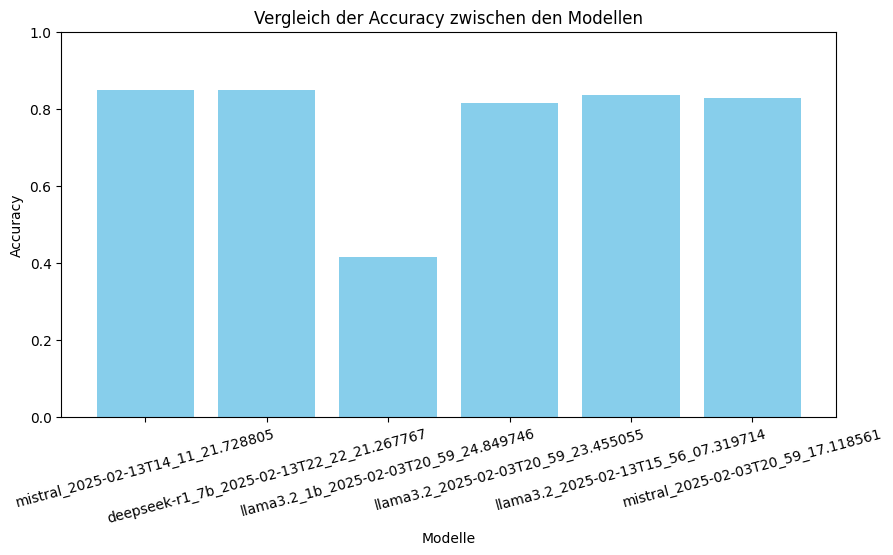

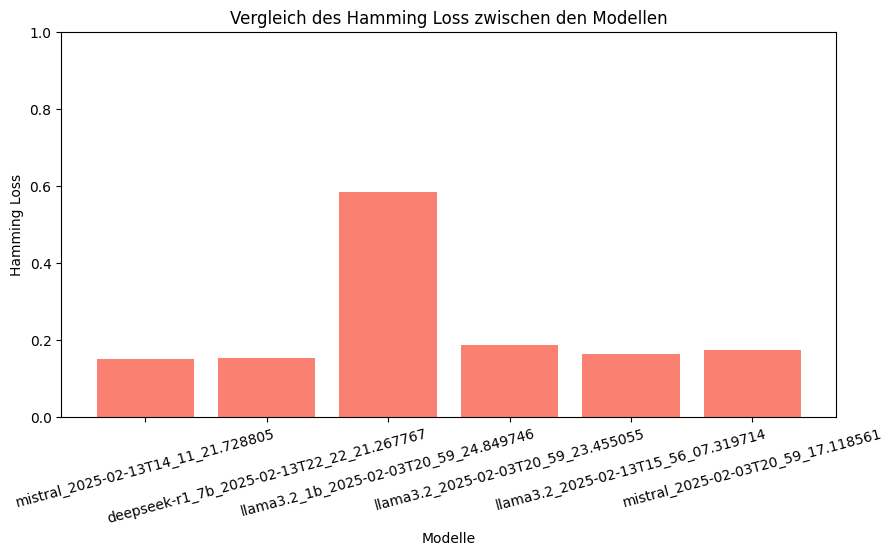

,Model,Accuracy,Hamming Loss
0,mistral_2025-02-13T14_11_21.728805,0.849451,0.150549
1,deepseek-r1_7b_2025-02-13T22_22_21.267767,0.849108,0.150892
2,llama3.2_1b_2025-02-03T20_59_24.849746,0.415638,0.584362
3,llama3.2_2025-02-03T20_59_23.455055,0.814129,0.185871
4,llama3.2_2025-02-13T15_56_07.319714,0.836420,0.163580
5,mistral_2025-02-03T20_59_17.118561,0.827846,0.172154


In [37]:
# Erstellen eines DataFrame
df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy_values,
    "Hamming Loss": hamming_loss_values
})

# Balkendiagramm für Accuracy
plt.figure(figsize=(10,5))
plt.bar(df["Model"], df["Accuracy"], color='skyblue')
plt.xlabel("Modelle")
plt.ylabel("Accuracy")
plt.title("Vergleich der Accuracy zwischen den Modellen")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

# Balkendiagramm für Hamming Loss
plt.figure(figsize=(10,5))
plt.bar(df["Model"], df["Hamming Loss"], color='salmon')
plt.xlabel("Modelle")
plt.ylabel("Hamming Loss")
plt.title("Vergleich des Hamming Loss zwischen den Modellen")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

# Ausgabe der Tabelle
df